# Imports

In [57]:
import scanpy as sc
import pandas as pd
import torch
import numpy

import fiberedae.models.fae as vmod
import fiberedae.utils.basic_trainer as vtrain
import fiberedae.utils.persistence as vpers
import fiberedae.utils.single_cell as vsc
import fiberedae.utils.nn as vnnutils
import fiberedae.utils.plots as vplots
import fiberedae.utils.fae as vfae
import fiberedae.utils.datasets as vdatasets

from anndata import AnnData

import fiberedae.utils.useful as us

# Loading dataset and configuration

In [2]:
config = us.load_configuration("configurations/olivetti_1d.json")
dataset = us.load_dataset(config)

In [3]:
model_args = dict(config["model"])
model_args.update(
    dict(
        x_dim=dataset["shapes"]["input_size"],
        nb_class=dataset["shapes"]["nb_class"],
        output_transform=vnnutils.ScaleNonLinearity(-1., 1., dataset["sample_scale"][0], dataset["sample_scale"][1]),
    )
)
#make model
model = vmod.FiberedAE(**model_args)
model.to("cuda")

#train model
trainer, history = us.train(model, dataset, config, nb_epochs=config["hps"]["nb_epochs"])

  0%|          | 0/1000 [00:00<?, ?it/s]

running on: cuda


re: 0.0054,coad: 3.6868,pr: 3.4519,cofige: 3.4608,gage: 0.7993,gadi: 0.6095: 100%|██████████| 1000/1000 [1:16:51<00:00,  4.60s/it]


In [18]:
trainer, history = us.train(model, dataset, config, nb_epochs=config["hps"]["nb_epochs"])

re: 0.0034,coad: 3.6884,pr: 3.2870,cofige: 3.2895,gage: 0.8795,gadi: 0.5641: 100%|██████████| 1000/1000 [1:18:06<00:00,  4.69s/it]


In [26]:
trainer, history = us.train(model, dataset, config, nb_epochs=config["hps"]["nb_epochs"])

re: 0.0043,coad: 3.6891,pr: 3.2514,cofige: 3.2519,gage: 1.0772,gadi: 0.4693: 100%|██████████| 1000/1000 [1:20:08<00:00,  4.76s/it]


In [31]:
trainer, history = us.train(model, dataset, config, nb_epochs=config["hps"]["nb_epochs"])

re: 0.0020,coad: 3.6894,pr: 3.2491,cofige: 3.2494,gage: 1.0644,gadi: 0.4632: 100%|██████████| 1000/1000 [1:20:16<00:00,  4.77s/it]


In [33]:
vpers.save_model(model, {}, history, {}, dataset["label_encoding"], model_args,
                 "./trained_models/olivetti_%e.pytorch.mdl" % config["hps"]["nb_epochs"] 
                )

In [42]:
#model = vpers.load_model("./trained_models/olivetti_4000e.pytorch.mdl", vmod.FiberedAE, "cpu")[0]

## Learning curves

In [ ]:
vplots.interactive_line_plots(
    dct_values = {
        "R": history["train"]["reconstruction"]
    },
    x_label = "epochs",
    y_label = "loss",
)

# Plots

## Base space

In [27]:
latent_space = vfae.get_latent_space(
    model=model,
    data_loader=dataset["loaders"]["train"],
    batch_formater=dataset["batch_formater"],
    label_encoding=dataset["label_encoding"]
)

<module 'matplotlib.pyplot' from '/home/tariq/miniconda3/envs/mldev/lib/python3.7/site-packages/matplotlib/pyplot.py'>

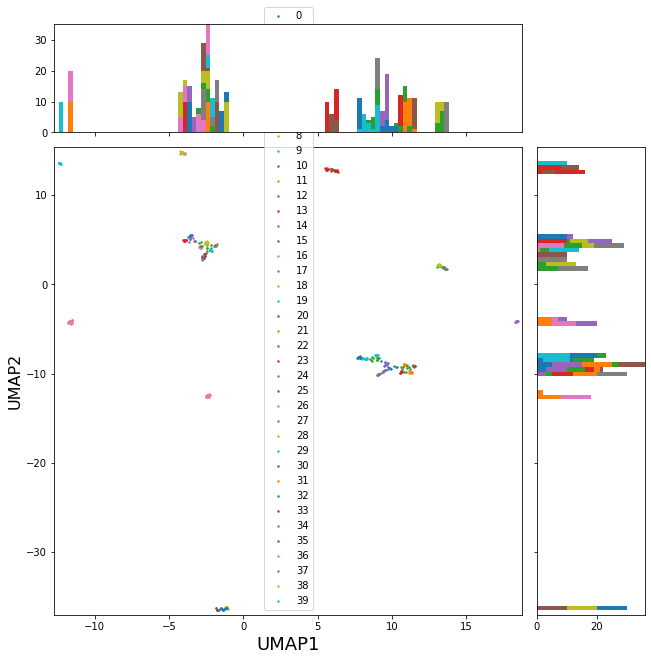

In [11]:
vplots.plot_latent(latent_space["base_space"], latent_space["str_labels"], point_opacity=1 )

## Fiber space

<module 'matplotlib.pyplot' from '/home/tariq/miniconda3/envs/mldev/lib/python3.7/site-packages/matplotlib/pyplot.py'>

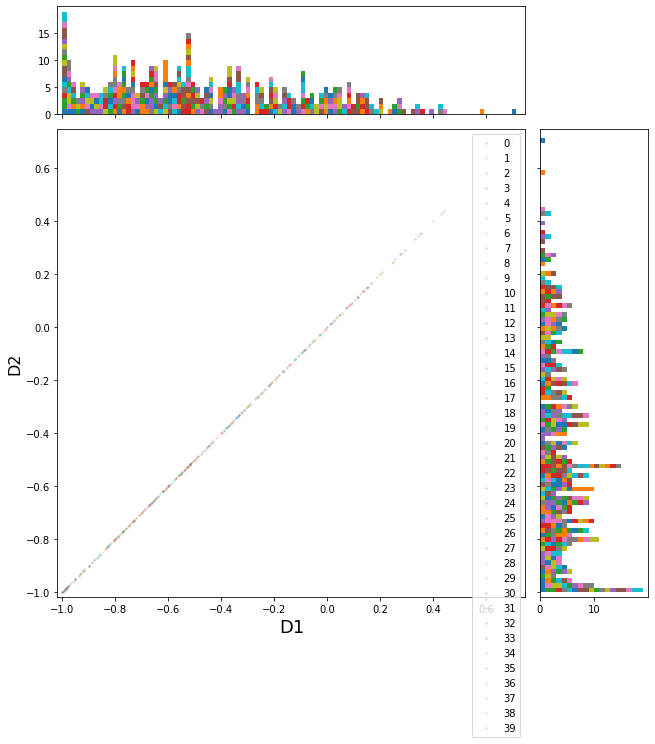

In [12]:
vplots.plot_latent(latent_space["fiber_space"], latent_space["str_labels"])

## Fiber manifold plots for different conditions

<module 'matplotlib.pyplot' from '/home/tariq/miniconda3/envs/mldev/lib/python3.7/site-packages/matplotlib/pyplot.py'>

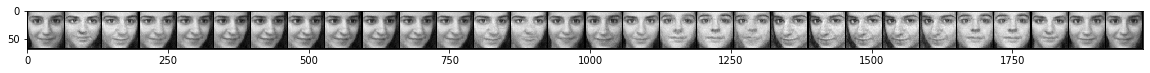

In [56]:
vplots.latent_grid_plot(
    model=model,
    condition=9,
    nb_ticks=30,
    start=0,
    stop=2*numpy.pi
)

<module 'matplotlib.pyplot' from '/home/tariq/miniconda3/envs/mldev/lib/python3.7/site-packages/matplotlib/pyplot.py'>

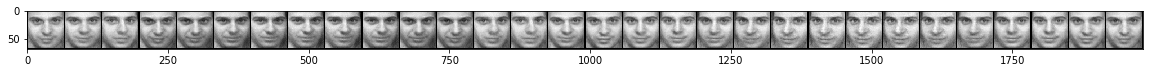

In [53]:
vplots.latent_grid_plot(
    model=model,
    condition=8,
    nb_ticks=30,
    start=0,
    stop=2*numpy.pi
)

<module 'matplotlib.pyplot' from '/home/tariq/miniconda3/envs/mldev/lib/python3.7/site-packages/matplotlib/pyplot.py'>

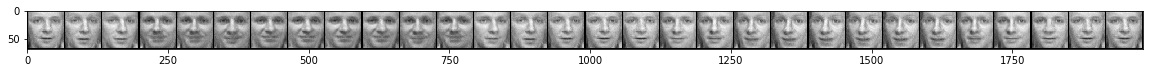

In [54]:
vplots.latent_grid_plot(
    model=model,
    condition=20,
    nb_ticks=30,
    start=0,
    stop=2*numpy.pi
)

<module 'matplotlib.pyplot' from '/home/tariq/miniconda3/envs/mldev/lib/python3.7/site-packages/matplotlib/pyplot.py'>

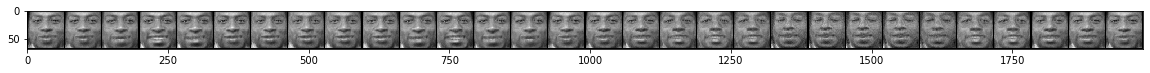

In [55]:
vplots.latent_grid_plot(
    model=model,
    condition=21,
    nb_ticks=30,
    start=0,
    stop=2*numpy.pi
)